In [383]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib as plt
import seaborn as sns
import numpy as np

In [384]:
# Load the dataset

df = pd.read_csv('/Users/celty/Downloads/archive/train.csv')

/var/folders/05/d9ht8d1s3rs1ny1n4s1z1_zc0000gn/T/ipykernel_9317/395779295.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/celty/Downloads/archive/train.csv')


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [386]:
# Check for missing values

df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [387]:
# Due to the Customer ID does not have missing value and is able to represent the customer identity of each customer, 
# Name coloumn with missing value is not important, which can be delete.

df = df.drop('Name', axis=1)

In [388]:
# Check unique values in each categorical column

df.select_dtypes(include=['object']).nunique()

ID                         100000
Customer_ID                 12500
Month                           8
Age                          1788
SSN                         12501
Occupation                     16
Annual_Income               18940
Num_of_Loan                   434
Type_of_Loan                 6260
Num_of_Delayed_Payment        749
Changed_Credit_Limit         4384
Credit_Mix                      4
Outstanding_Debt            13178
Credit_History_Age            404
Payment_of_Min_Amount           3
Amount_invested_monthly     91049
Payment_Behaviour               7
Monthly_Balance             98792
Credit_Score                    3
dtype: int64

In [389]:
# Get descriptive statistics and check numerical columns

df.describe(include='all')

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000,84998.000000,100000.000000,100000.00000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,1788,12501,16,18940,NaN,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,38,#F%$D@*&8,_______,36585.12,NaN,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,2833,5572,7062,16,NaN,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,22.47443,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,129.05741,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.00000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,4.00000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,5.00000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,7.00000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [390]:
# Find error value in SSN, which needs to be checked.

# Remove rows where SSN does not match the pattern XXX-XX-XXXX
df_ssn = df[df['SSN'].str.match(r"^\d{3}-\d{2}-\d{4}$", na=False)]

# Calculate the number of rows removed based on this single criterion
removed_rows_single_criterion = len(df) - len(df_ssn)

removed_rows_single_criterion

5572

In [391]:
# 5% of data are going to be removed, plus SSN is not very related to our analysis, we choose to remove the column.
df=df.drop('SSN', axis=1)

In [392]:
# Clean Age column.
# Convert Age column to numeric and fill in missing or erroneous ages with the mode in the group of Customer ID.

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].apply(lambda x: x if 0 < x < 100 else None)
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

In [393]:
# Clean Occupation column.

df['Occupation'] = df['Occupation'].replace('_______', np.nan)

In [394]:
# Fill in missing occupations

df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [395]:
df[df['Occupation'].isin(['_______'])]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [396]:
# Clean and convert Annual_Income and Monthly_Inhand_Salary columns to numeric.

for column in ['Annual_Income', 'Monthly_Inhand_Salary']:
    df[column] = df[column].replace('[^0-9.]','', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [397]:
# Clean and convert a list of numerical columns

num_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
            'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
            'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
            'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


for column in num_cols:
    df[column] = df[column].replace('[^0-9.]','', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [398]:
# Fill in missing or changed Annual_Income based on occupation

mode_annual_income = df.groupby('Customer_ID')['Annual_Income'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
mode_annual_income.columns = ['Customer_ID', 'Mode_Annual_Income']

df = pd.merge(df, mode_annual_income, on='Customer_ID', how='left')

df.loc[(df['Annual_Income'].isna()) & (df['Occupation'] == df['Occupation'].shift()), 'Annual_Income'] = df['Mode_Annual_Income']
df.loc[(df['Annual_Income'].isna()) & (df['Occupation'] != df['Occupation'].shift()), 'Annual_Income'] = df['Annual_Income'].fillna(method='ffill')

df.drop('Mode_Annual_Income', axis=1, inplace=True)

In [399]:
# Fill in missing Monthly_Inhand_Salary based on customer ID

mode_monthly_salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
mode_monthly_salary.columns = ['Customer_ID', 'Mode_Monthly_Salary']

df = pd.merge(df, mode_monthly_salary, on='Customer_ID', how='left')

df.loc[df['Monthly_Inhand_Salary'].isna(), 'Monthly_Inhand_Salary'] = df['Mode_Monthly_Salary']

df.drop('Mode_Monthly_Salary', axis=1, inplace=True)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  float64
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int64  
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    92998 non-null   fl

In [401]:
# Clean Type_of_Loan column, and get dummies for each type

df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "No Loan"))
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: [i.strip() for i in x.replace("and", ",").split(",") if i.strip()])

for loan in set([j for i in df['Type_of_Loan'].tolist() for j in i]):
    df[loan] = df['Type_of_Loan'].apply(lambda x: 1 if loan in x else 0)

In [402]:
# Rename 'Not Specified' column to 'Other'

df.rename(columns={'Not Specified': 'Other'}, inplace=True)

In [403]:
# Clean Credit_Mix column

df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [404]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Payday Loan                    0
Student Loan                   0
Mortgage Loan                  0
Credit-Builder Loan            0
Auto Loan 

In [405]:
# Split Credit_History_Age into years and months, calculate the total age in months, and handle missing values

df[['Years', 'Months']] = df['Credit_History_Age'].str.split(' and ', expand=True)
df['Years'] = df['Years'].str.replace(' Years', '').astype(float)
df['Months'] = df['Months'].str.replace(' Months', '').astype(float)
df['Total_Age_in_Months'] = df['Years']*12 + df['Months']

# Convert Total_Age_in_Months to float

df['Total_Age_in_Months'] = df['Total_Age_in_Months'].astype(float)

# Fill NaN values

# Interpolate missing values

df['Total_Age_in_Months'] = df.groupby('Customer_ID')['Total_Age_in_Months'].apply(lambda group: group.interpolate()).reset_index(level=0, drop=True)

# Drop columns

df.drop(['Years', 'Months', 'Credit_History_Age'], axis=1, inplace=True)

In [406]:
# For each numerical column, identify the unique values and their frequencies

unique_values = {column: df.groupby('Customer_ID')[column].nunique() for column in num_cols}

In [407]:
# Identify the columns with erroneous values, i.e., those with more than one unique value per customer ID

erroneous_columns = [column for column in unique_values if any(unique_values[column] > 1)]

In [408]:
# Replace erroneous values in each column with the mode of the customer ID, this is to replace garbage values that could exist

for column in erroneous_columns:
    mode_values = df.groupby('Customer_ID')[column].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
    mode_values.columns = ['Customer_ID', 'Mode_Value']
    df = pd.merge(df, mode_values, on='Customer_ID', how='left')
    df.loc[df[column] != df['Mode_Value'], column] = df['Mode_Value']
    df.drop('Mode_Value', axis=1, inplace=True)

In [409]:
# Payment_Behaviour - Replacing  erroneous values with the mode of the customer ID

mode_values = df.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
mode_values.columns = ['Customer_ID', 'Mode_Value']
df = pd.merge(df, mode_values, on='Customer_ID', how='left')
df.loc[df['Payment_Behaviour'] != df['Mode_Value'], 'Payment_Behaviour'] = df['Mode_Value']
df.drop('Mode_Value', axis=1, inplace=True)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  float64
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int64  
 11  Type_of_Loan              100000 non-null  object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  fl

In [411]:
# Delete total age in months for dimention reduction.
df = df.drop('Total_Age_in_Months', axis=1)

In [412]:
import matplotlib.pyplot as plt

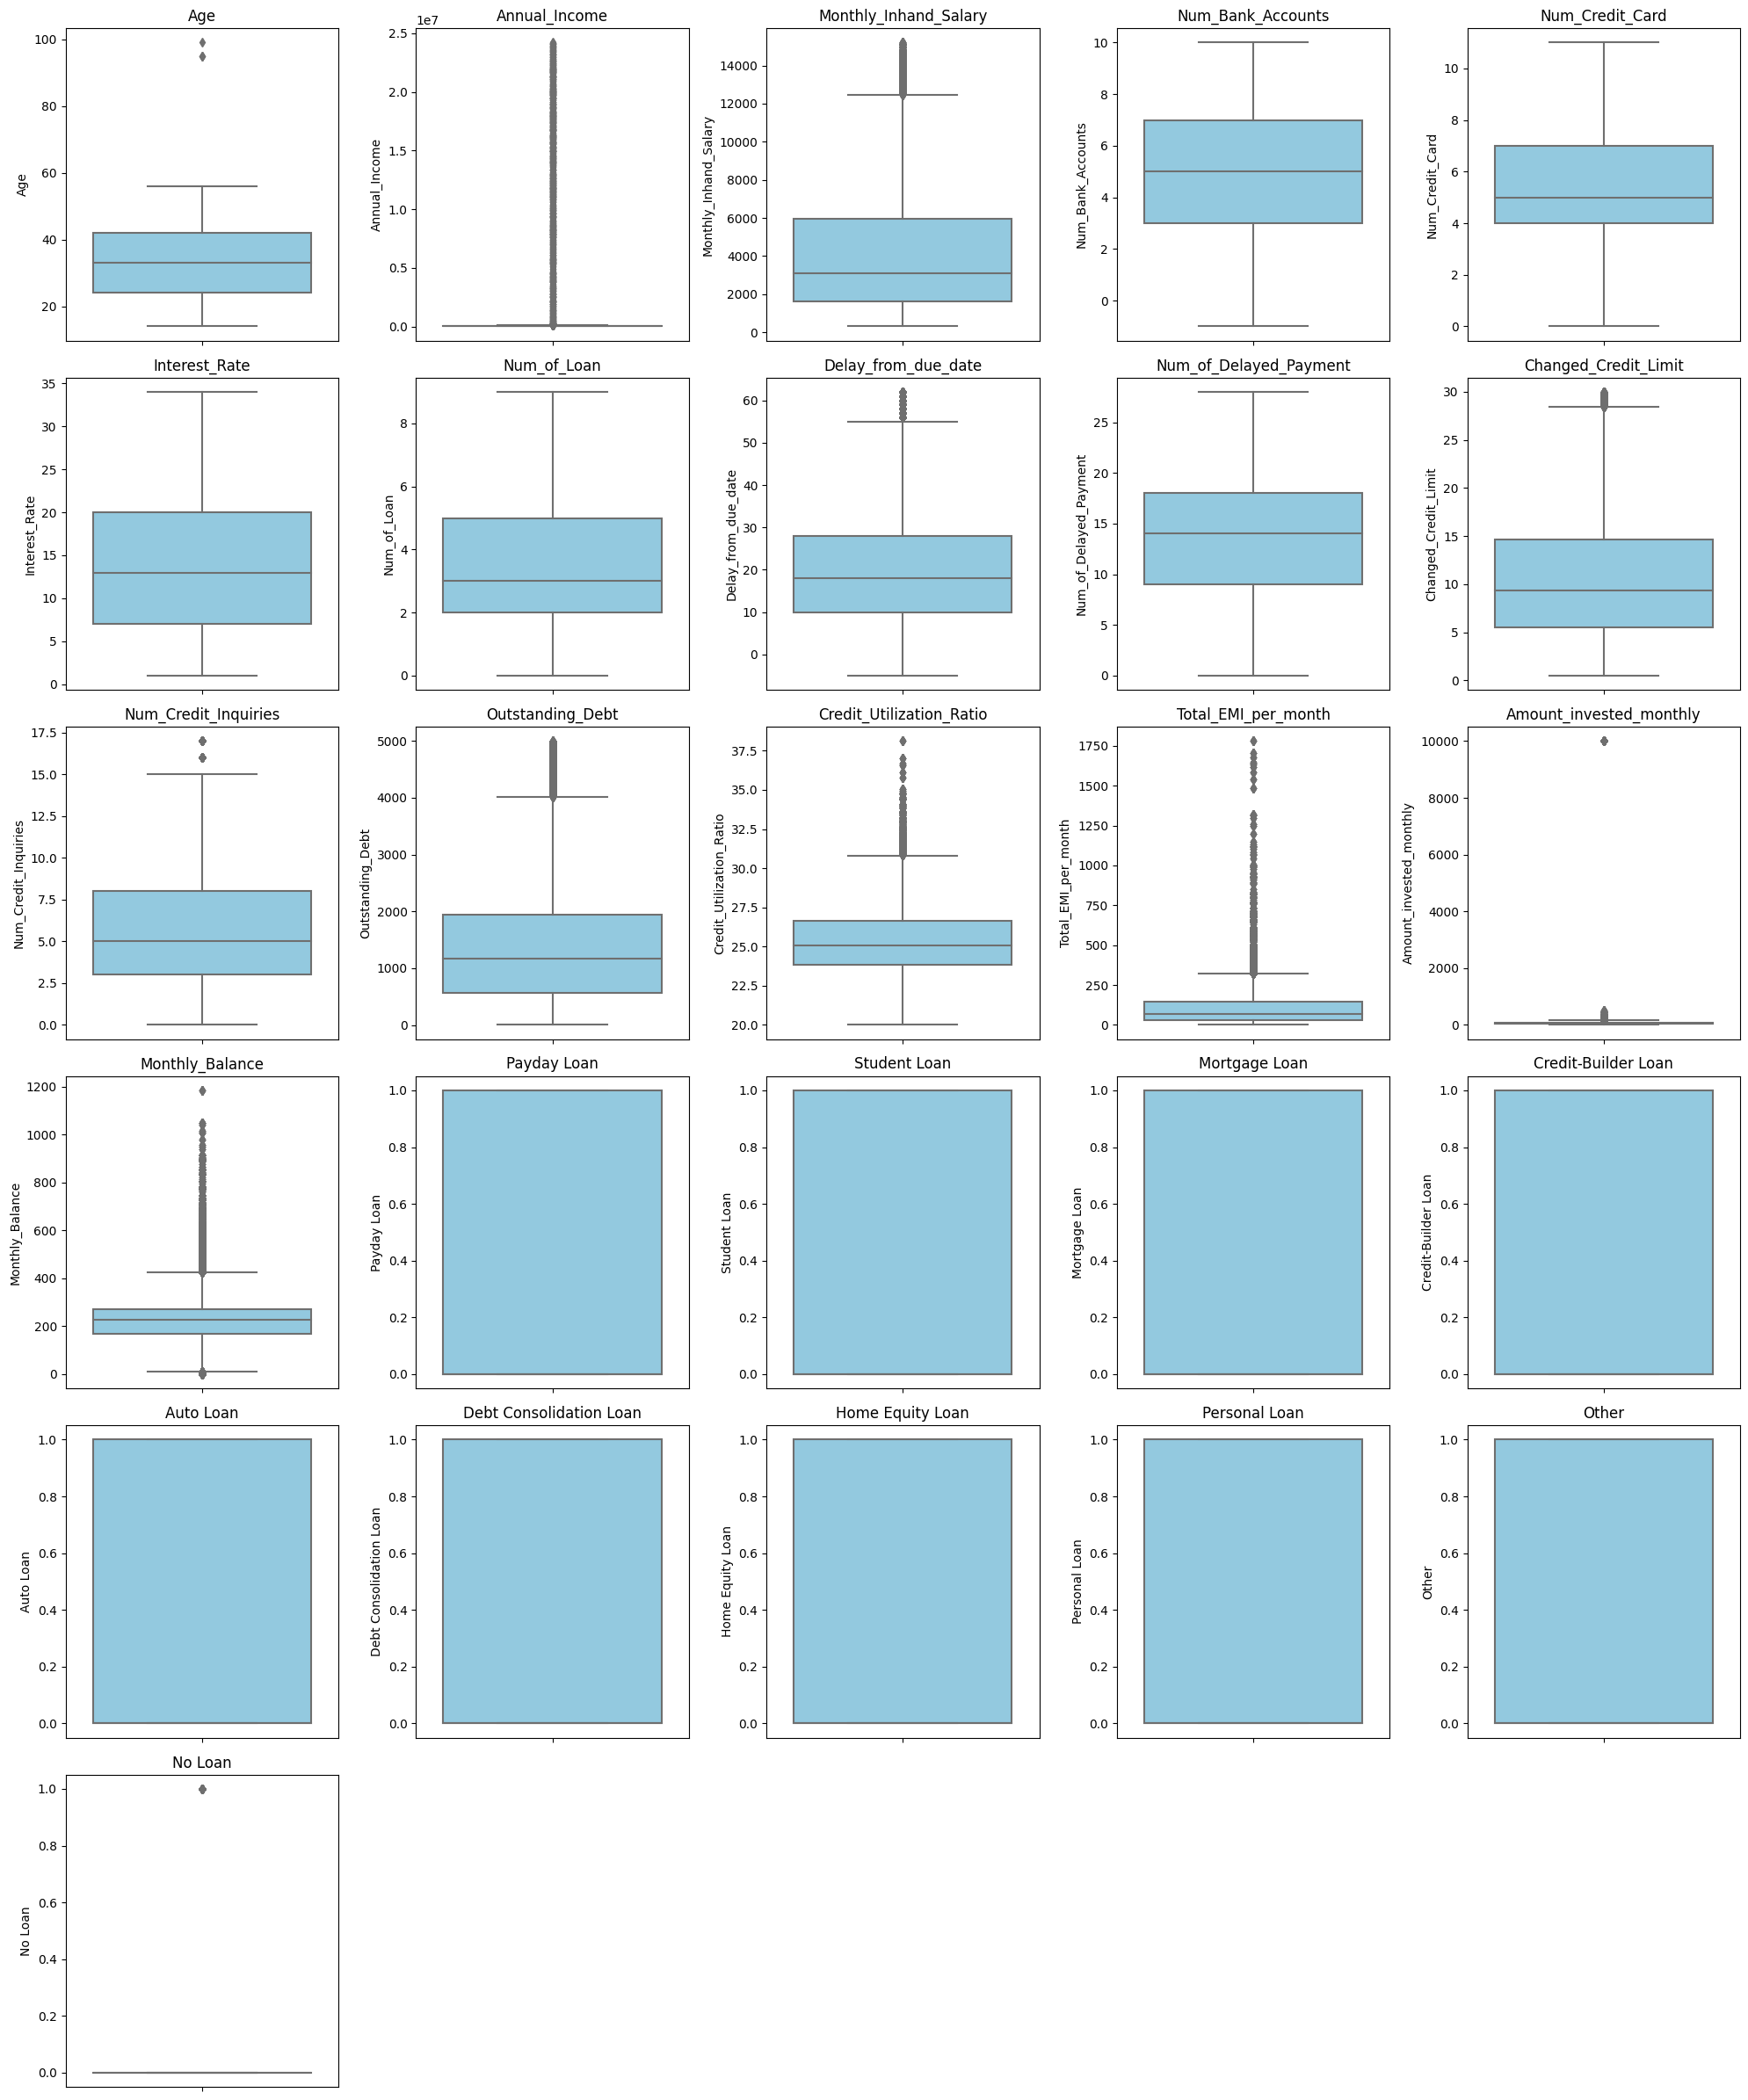

In [413]:
# Check Outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n = len(numeric_cols)
ncols = 5
nrows = n // ncols + (1 if n % ncols else 0)

plt.figure(figsize=(20, nrows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=df[col],color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

# We will check age, number of credit card inquiries, amount invested monthly

In [414]:
# Drop Age outliers
df['Age'].sort_values(ascending=False).head(10)

28718    99.0
78564    95.0
38248    95.0
65420    95.0
16967    56.0
74711    56.0
74710    56.0
74709    56.0
74708    56.0
26991    56.0
Name: Age, dtype: float64

In [415]:
drop_unit_outliers = df[df['Age'] >= 95].index
drop_unit_outliers

Index([28718, 38248, 65420, 78564], dtype='int64')

In [416]:
df.drop(drop_unit_outliers, inplace=True)

In [417]:
# Check Num_Credit_Inquiries outliers
df['Num_Credit_Inquiries'].sort_values(ascending=False).head(1420)
# The value seems reasonable that about 1400 people has inquired 15-17 times of credit cards.                                                  

30224    17.0
47465    17.0
193      17.0
192      17.0
74015    17.0
         ... 
93364    15.0
95105    14.0
78966    14.0
48924    14.0
48925    14.0
Name: Num_Credit_Inquiries, Length: 1420, dtype: float64

In [418]:
# Check monthly investments
pd.value_counts(df['Amount_invested_monthly']==10000)
# This seems that 4% of people choose to invest 10000 every month, which is reasonable for high income individuals, therefore, will not drop.

Amount_invested_monthly
False    95548
True      4448
Name: count, dtype: int64

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99996 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        99996 non-null  object 
 1   Customer_ID               99996 non-null  object 
 2   Month                     99996 non-null  object 
 3   Age                       99996 non-null  float64
 4   Occupation                99996 non-null  object 
 5   Annual_Income             99996 non-null  float64
 6   Monthly_Inhand_Salary     99996 non-null  float64
 7   Num_Bank_Accounts         99996 non-null  int64  
 8   Num_Credit_Card           99996 non-null  int64  
 9   Interest_Rate             99996 non-null  int64  
 10  Num_of_Loan               99996 non-null  int64  
 11  Type_of_Loan              99996 non-null  object 
 12  Delay_from_due_date       99996 non-null  int64  
 13  Num_of_Delayed_Payment    99996 non-null  float64
 14  Changed_Cre

In [425]:
df.to_csv('train_cleaned.csv')

In [426]:
df_cleaned = df.copy()

### EDA ANALYSIS

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [439]:
df['Annual_Income'].sort_values(ascending=False).head(10)

48302    24198062.0
7814     24188807.0
59059    24177153.0
14588    24160009.0
27262    24105369.0
39829    24105151.0
12307    24096975.0
85379    24065688.0
61389    24008957.0
81585    23942655.0
Name: Annual_Income, dtype: float64

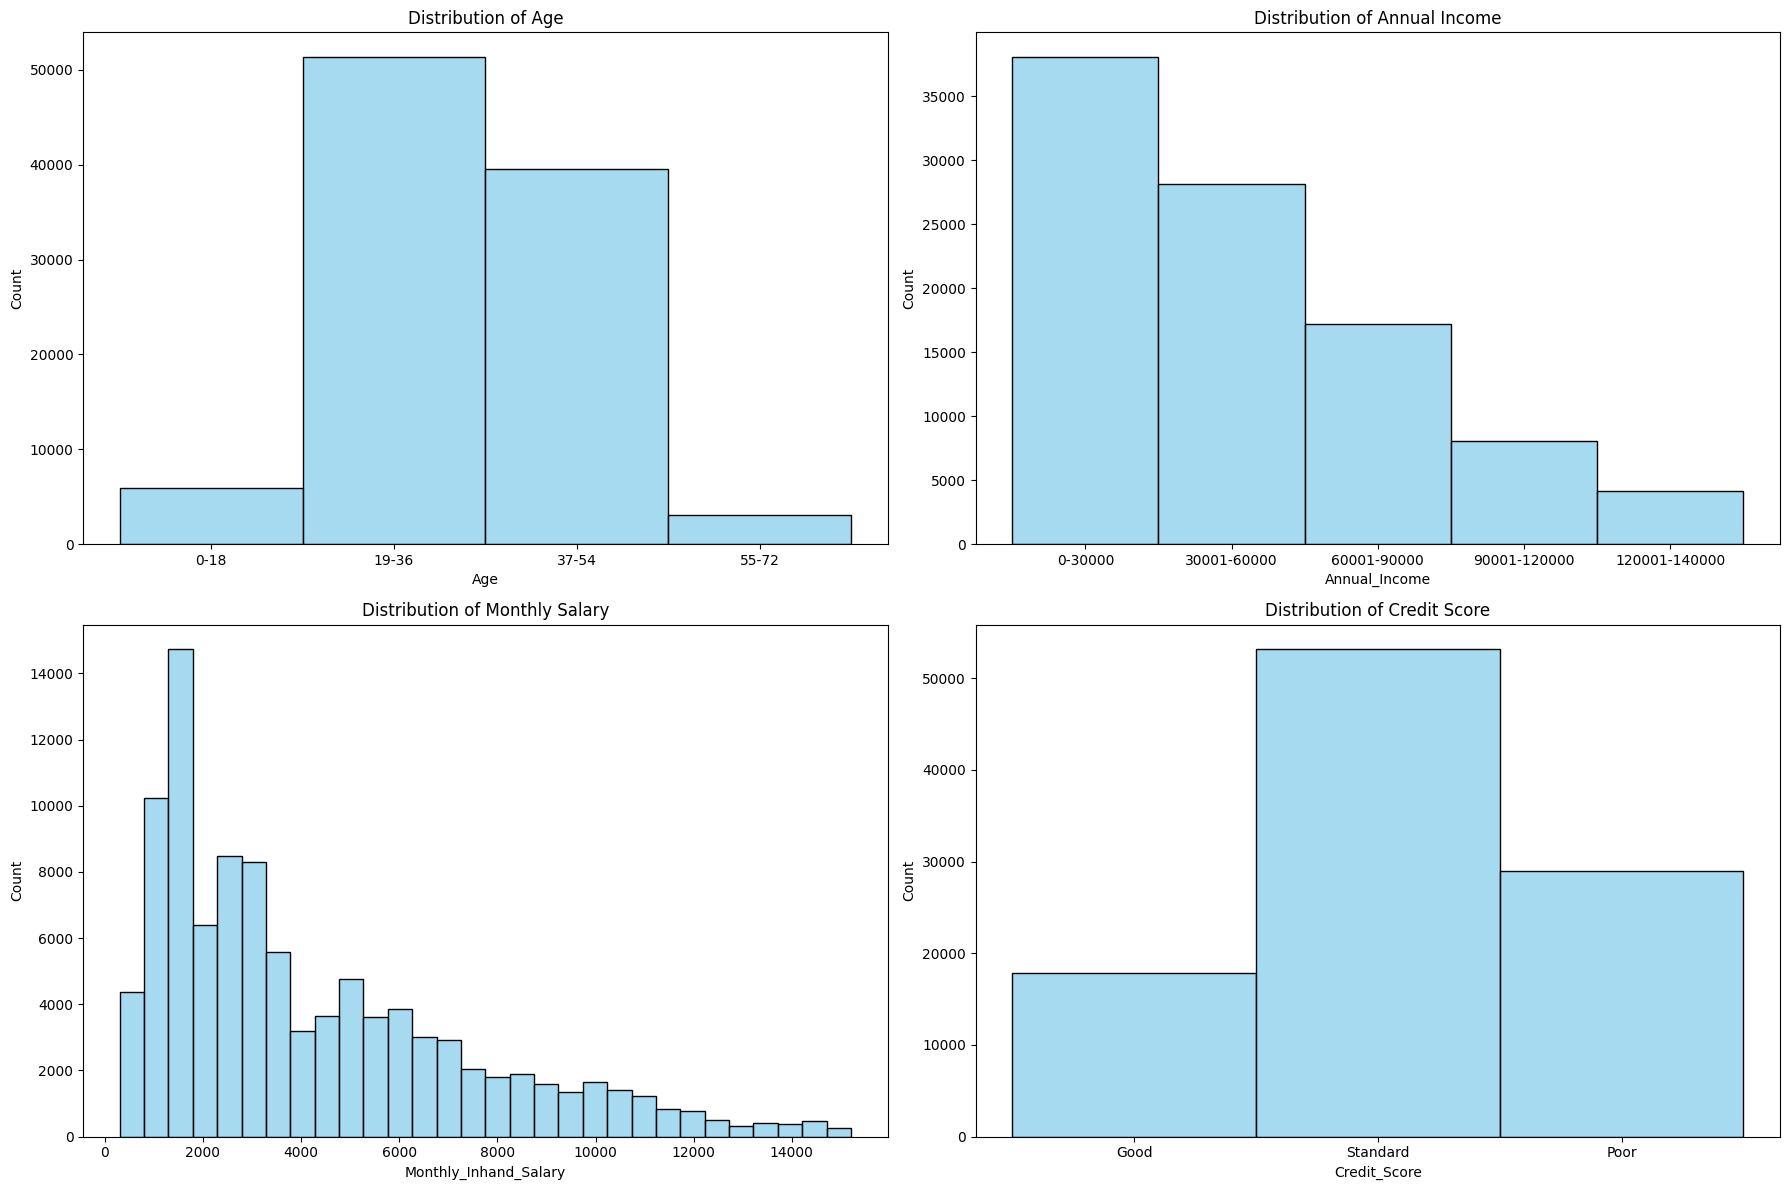

In [437]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Age
bins = [0, 18, 36, 54, 72, 100]
labels = ["0-18", "19-36", "37-54", "55-72", "73-100"]
df_cleaned['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
sns.histplot(ax=axes[0, 0], data=df_cleaned, x="Age", bins=30, color='skyblue')
axes[0, 0].set_title('Distribution of Age')

# Annual_Income
bins = [0, 30000, 60000, 90000, 120000, 140000, 200000]
labels = ["0-30000", "30001-60000", "60001-90000", "90001-120000", "120001-140000"]
df_cleaned['Annual_Income'] = pd.cut(df['Annual_Income'], bins=bins, labels=labels, right=False)
sns.histplot(ax=axes[0, 1], data=df_cleaned, x="Annual_Income", bins=30, color='skyblue')
axes[0, 1].set_title('Distribution of Annual Income')



# Monthly_Inhand_Salary

sns.histplot(ax=axes[1, 0], data=df_cleaned, x="Monthly_Inhand_Salary", bins=30, color='skyblue')
axes[1, 0].set_title('Distribution of Monthly Salary')

# Credit_Score

sns.histplot(ax=axes[1, 1], data=df_cleaned, x="Credit_Score", bins=30, color='skyblue')
axes[1, 1].set_title('Distribution of Credit Score')

plt.tight_layout()
plt.show()